In [22]:
import torch

import numpy as np

print(torch.__version__)

print(torch.cuda.get_device_name(0))  # 顯示你的 GPU 型號

torch.cuda.is_available() # True 代表 GPU 可以用

2.7.1+cu126
NVIDIA GeForce RTX 4060


True

In [6]:
x = torch.tensor(4.0, requires_grad=True)

y = x**2

print(y)

print(x.grad_fn)

y.backward()

print(x.grad)  # 輸出梯度

tensor(16., grad_fn=<PowBackward0>)
None
tensor(8.)


In [10]:
x = torch.tensor(1.0, requires_grad=True)
y = torch.tensor(2.0, requires_grad=True)

z = x*y

for i, name in zip([x, y, z], ['x', 'y', 'z']):
    print(f"{name}\ndata : {i.data}\nrequires_grad : {i.requires_grad}\ngrad_fn : {i.grad_fn}\ngrad : {i.grad if i.grad is not None else 'None'}\n")

x
data : 1.0
requires_grad : True
grad_fn : None
grad : None

y
data : 2.0
requires_grad : True
grad_fn : None
grad : None

z
data : 2.0
requires_grad : True
grad_fn : <MulBackward0 object at 0x00000293E4F9A080>
grad : None



C:\Users\User\AppData\Local\Temp\ipykernel_28504\1721084754.py:7: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\build\aten\src\ATen/core/TensorBody.h:494.)
  print(f"{name}\ndata : {i.data}\nrequires_grad : {i.requires_grad}\ngrad_fn : {i.grad_fn}\ngrad : {i.grad if i.grad is not None else 'None'}\n")


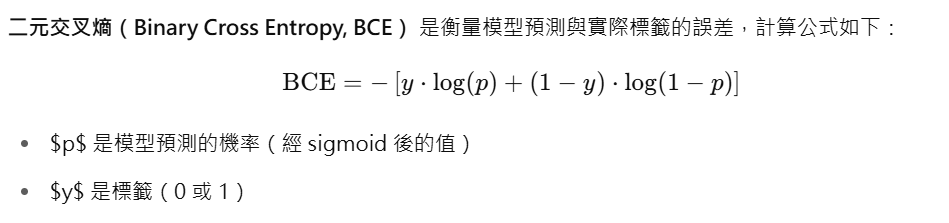

In [43]:
x = torch.ones(5) # x 是一個一維張量，包含5個元素
y = torch.zeros(3) # y 是一個一維張量，包含3個元素
w = torch.rand(5, 3, requires_grad=True)  # 定義一個大小 5x3 的矩陣，元素都是隨機數
b = torch.rand(3, requires_grad=True) # w 和 b 都需要梯度


z = torch.matmul(x, w) + b # z = x @ w + b

loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y) # 使用二元交叉熵損失函數

print(z.grad_fn) #grad_fn: gradient function

print(loss.grad_fn)

loss.backward() #loss函數回朔到回去

print(w.grad)
print(b.grad)




tensor([[0.3203, 0.2857, 0.3300],
        [0.3203, 0.2857, 0.3300],
        [0.3203, 0.2857, 0.3300],
        [0.3203, 0.2857, 0.3300],
        [0.3203, 0.2857, 0.3300]])
tensor([0.3203, 0.2857, 0.3300])
